In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler

In [4]:
# Load the dataset
data = pd.read_csv('../data/energy.csv')
data.head()

,ON/OFF,PHASE,ACTIVE,REACTIVE,PHASE ANGLE,H1,H3,H5,H7,H9,...,H17,T1,T2,T3,T4,T5,T6,T7,T8,T9
0,1,0,54.6,-3.1,23.3,93.0,160.9,180.8,192.4,118.4,...,271.1,-100.0,-91.6,-79.3,-63.6,-45.1,-25.0,-4.2,16.3,36.1
1,1,1,30.0,51.5,25.3,81.1,18.7,234.1,310.0,36.4,...,238.7,-100.0,-91.4,-79.1,-63.5,-45.2,-25.3,-4.5,16.2,36.2
2,1,2,20.0,-44.6,20.5,38.7,3.8,41.8,38.5,1.9,...,20.1,-100.0,-91.2,-78.4,-62.4,-44.1,-24.6,-4.2,16.8,36.8
3,2,0,47.7,-3.1,20.3,90.5,158.6,177.1,198.9,117.7,...,298.2,100.0,92.4,80.1,63.9,44.8,24.2,3.1,-17.6,-37.5
4,2,1,28.5,47.7,23.5,78.4,13.9,228.1,312.6,33.9,...,257.8,100.0,93.6,82.3,66.8,48.3,27.8,6.5,-14.7,-35.3


Phase 1 Distributions:


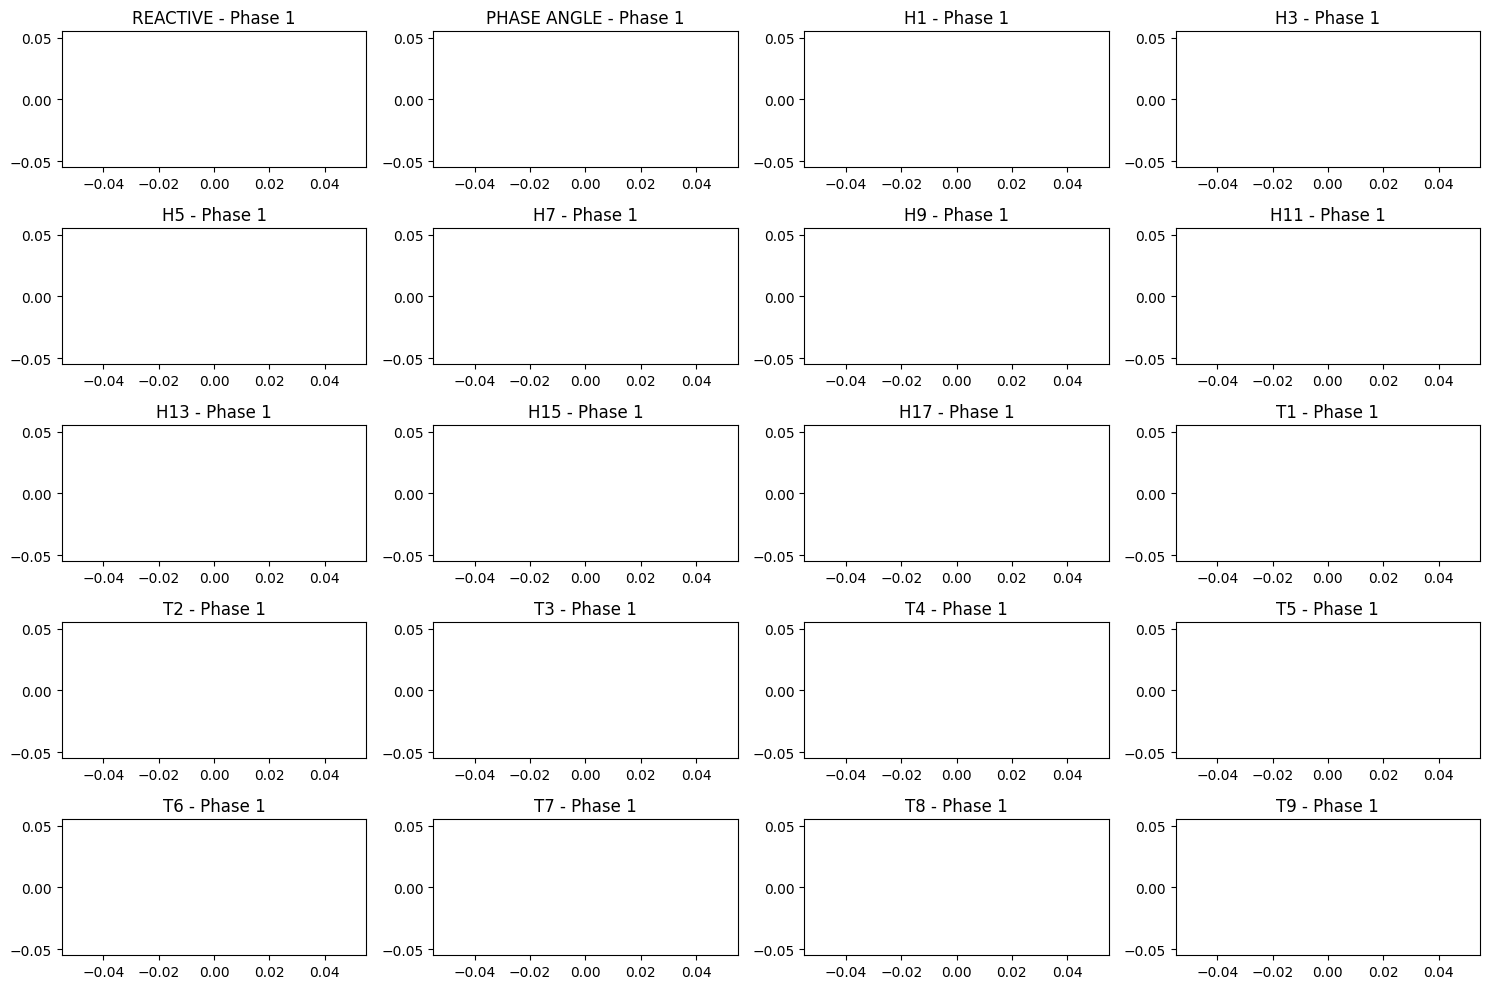

Phase 2 Distributions:


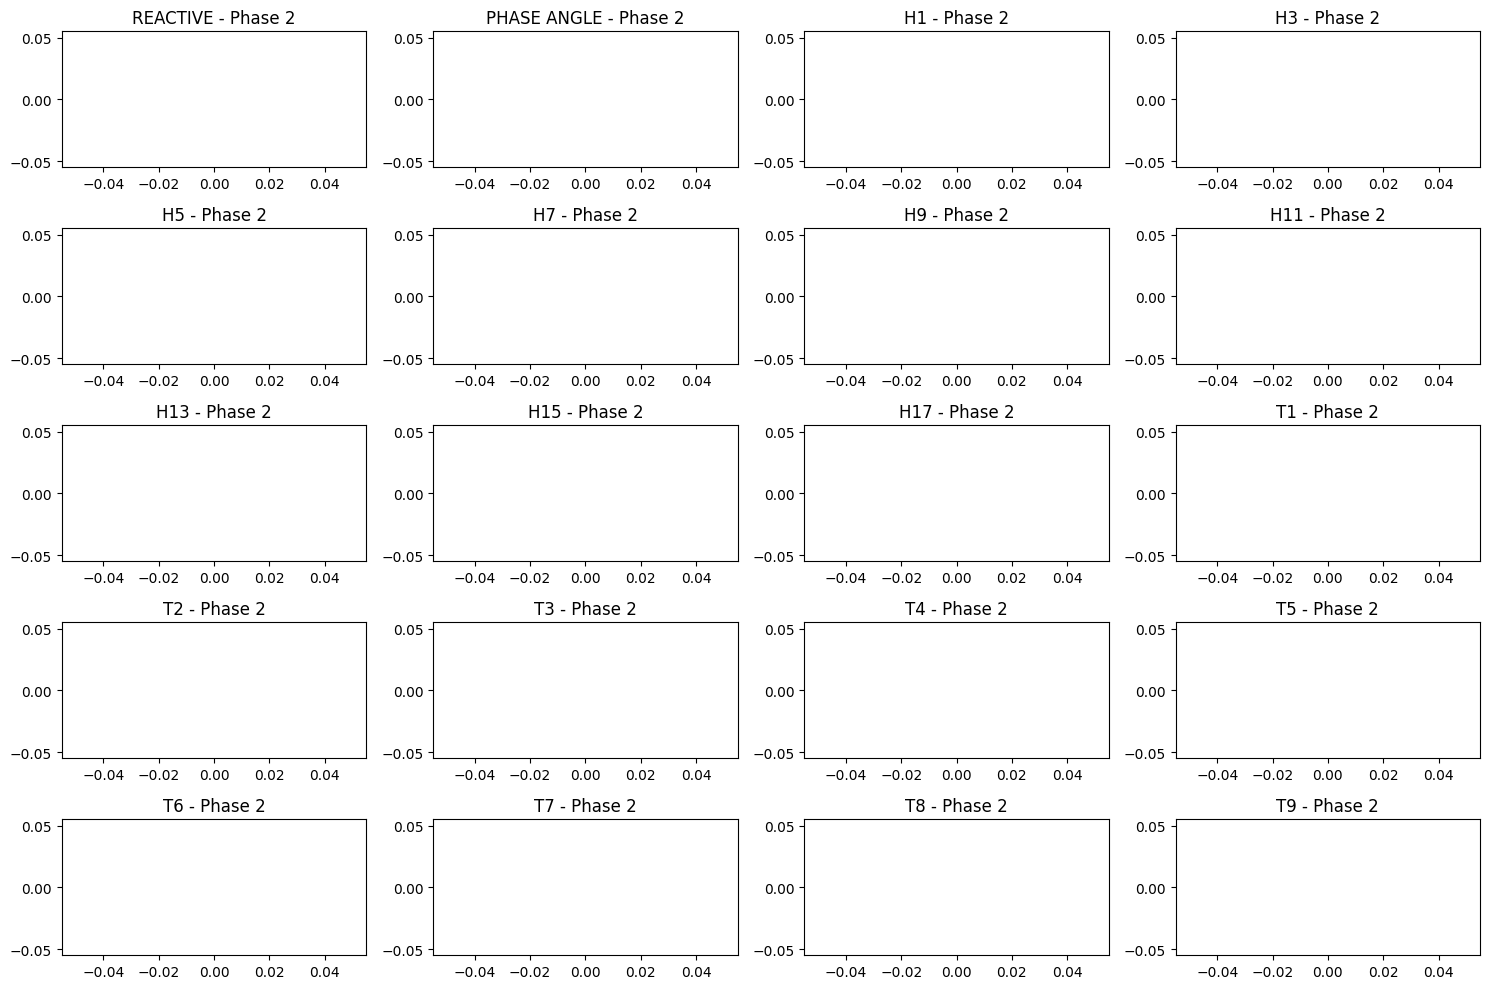

Phase 3 Distributions:


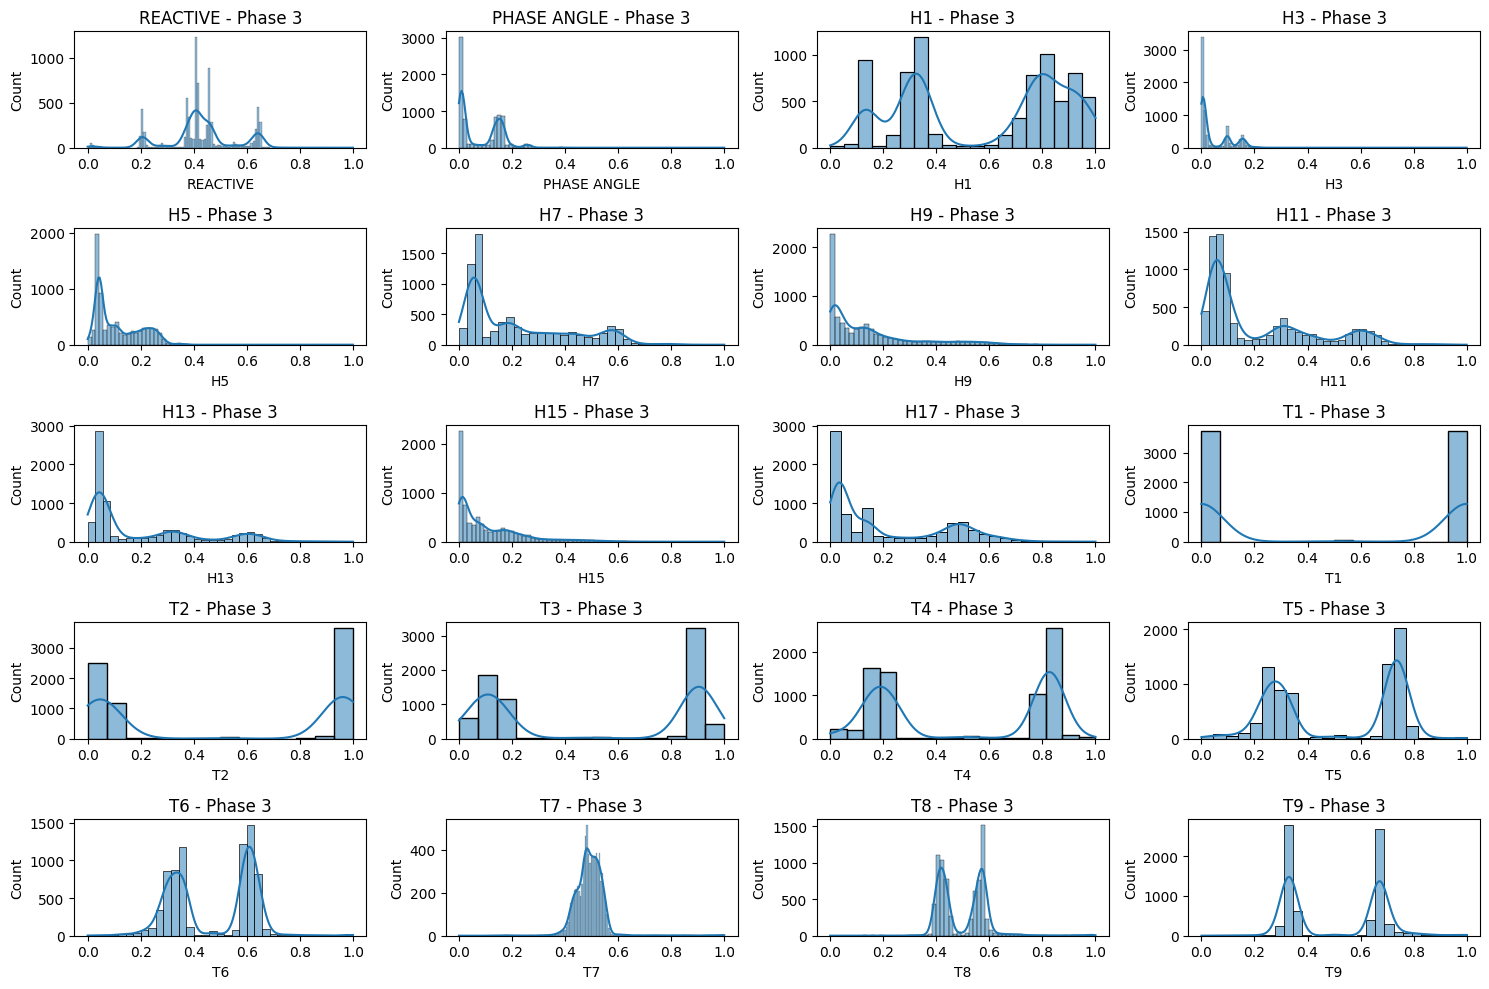

In [24]:
# Rename phase values to match real-world terminology
data['PHASE'] = data['PHASE'].replace({0: 1, 1: 2, 2: 3})

# Separate data by phase (with updated labels)
phase_1 = data[data['PHASE'] == 1]
phase_2 = data[data['PHASE'] == 2]
phase_3 = data[data['PHASE'] == 3]

# Function to plot distributions for each phase
def plot_phase_distributions(phase_data, phase_num):
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(phase_data.columns[3:], 1):  # Skipping ON/OFF and PHASE columns
        plt.subplot(5, 4, i)
        sns.histplot(phase_data[col], kde=True)
        plt.title(f'{col} - Phase {phase_num}')
    plt.tight_layout()
    plt.show()

# Visualize each phase
print("Phase 1 Distributions:")
plot_phase_distributions(phase_1, 1)

print("Phase 2 Distributions:")
plot_phase_distributions(phase_2, 2)

print("Phase 3 Distributions:")
plot_phase_distributions(phase_3, 3)

In [6]:
from sklearn.preprocessing import MinMaxScaler

# Select the columns to normalize
columns_to_normalize = ['ACTIVE', 'REACTIVE', 'PHASE ANGLE'] + [f'H{i}' for i in range(1, 18, 2)] + [f'T{i}' for i in range(1, 10)]

# Initialize the scaler
scaler = MinMaxScaler()

# Normalize the columns and update the DataFrame
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

# Verify normalization
data.describe()

,ON/OFF,PHASE,ACTIVE,REACTIVE,PHASE ANGLE,H1,H3,H5,H7,H9,...,H17,T1,T2,T3,T4,T5,T6,T7,T8,T9
count,7519.000000,7519.000000,7519.000000,7519.000000,7519.000000,7519.000000,7519.000000,7519.000000,7519.000000,7519.000000,...,7519.000000,7519.000000,7519.000000,7519.000000,7519.000000,7519.000000,7519.000000,7519.000000,7519.000000,7519.000000
mean,1.504189,1.979785,0.065088,0.426834,0.079113,0.582580,0.046900,0.114062,0.217850,0.141532,...,0.207504,0.500720,0.508499,0.509397,0.507631,0.505846,0.470942,0.493226,0.498366,0.506488
std,0.500016,0.817223,0.062316,0.128645,0.077980,0.300265,0.060388,0.085171,0.195453,0.165228,...,0.213410,0.497718,0.455040,0.397516,0.325477,0.240184,0.155099,0.061837,0.093424,0.183495
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.019467,0.379761,0.009592,0.309875,0.003647,0.043025,0.063134,0.013568,...,0.033071,0.000000,0.042000,0.103000,0.181000,0.272500,0.327068,0.463918,0.419174,0.329500
50%,2.000000,2.000000,0.036400,0.412545,0.025739,0.725312,0.011782,0.080657,0.147695,0.082412,...,0.116324,0.500000,0.795000,0.620500,0.591500,0.615000,0.555854,0.491753,0.491586,0.500000
75%,2.000000,3.000000,0.092800,0.462100,0.151719,0.838820,0.096596,0.188579,0.357184,0.191960,...,0.434340,1.000000,0.962500,0.904000,0.826000,0.735000,0.610902,0.522165,0.571647,0.672500
max,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# Convert ON/OFF to binary
data['ON/OFF'] = data['ON/OFF'].apply(lambda x: 1 if x == 1 else 0)

# Select features and include 'ON/OFF'
columns_with_on_off = ['ON/OFF'] + columns_to_normalize

In [18]:
data_preprocess = data[columns_with_on_off]

In [19]:
data_preprocess.head()

,ON/OFF,ACTIVE,REACTIVE,PHASE ANGLE,H1,H3,H5,H7,H9,H11,...,H17,T1,T2,T3,T4,T5,T6,T7,T8,T9
0,1,0.036400,0.410366,0.013269,0.920545,0.150458,0.213806,0.367324,0.594472,0.379124,...,0.520092,0.0,0.042,0.1035,0.1820,0.2745,0.330290,0.464948,0.574707,0.6805
1,1,0.020000,0.462100,0.016467,0.785471,0.017486,0.277685,0.592309,0.182412,0.640251,...,0.457797,0.0,0.043,0.1045,0.1825,0.2740,0.328679,0.463402,0.574197,0.6810
2,1,0.013333,0.371044,0.008793,0.304200,0.003553,0.047220,0.072891,0.009045,0.056031,...,0.037493,0.0,0.044,0.1080,0.1880,0.2795,0.332438,0.464948,0.577257,0.6840
3,0,0.031800,0.410366,0.008473,0.892168,0.148307,0.209372,0.379759,0.590955,0.364985,...,0.572198,1.0,0.962,0.9005,0.8195,0.7240,0.594522,0.502577,0.401836,0.3125
4,0,0.019000,0.458499,0.013589,0.754824,0.012998,0.270494,0.597283,0.169849,0.648455,...,0.494520,1.0,0.968,0.9115,0.8340,0.7415,0.613856,0.520103,0.416624,0.3235


Training for Phase 1
Epoch 1/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1088 - val_loss: 0.1031
Epoch 2/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0711 - val_loss: 0.0634
Epoch 3/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0409 - val_loss: 0.0412
Epoch 4/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0254 - val_loss: 0.0303
Epoch 5/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0174 - val_loss: 0.0248
Epoch 6/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0135 - val_loss: 0.0219
Epoch 7/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0111 - val_loss: 0.0202
Epoch 8/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0098 - val_loss: 0.0191
Epoch 9/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0093 - val_loss: 0.0181
Epoch 10/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0084 - val_loss: 0.0176
Epoch 11/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0077 - val_loss: 0.0163
Epoch 12/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - 

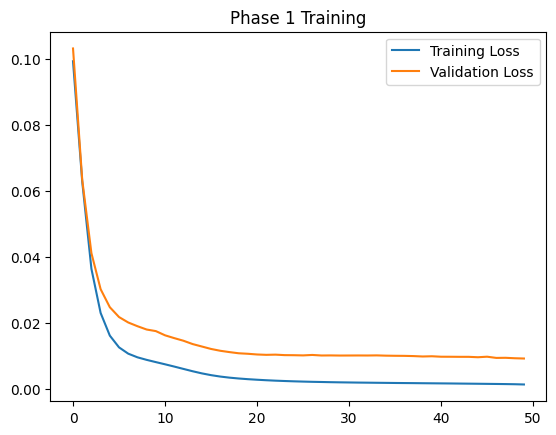

Training for Phase 2
Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1175 - val_loss: 0.1023
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0901 - val_loss: 0.0770
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0651 - val_loss: 0.0545
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0432 - val_loss: 0.0362
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0261 - val_loss: 0.0255
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0151 - val_loss: 0.0195
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0090 - val_loss: 0.0163
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0056 - val_loss: 0.0146
Epoch 9/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0039 - val_loss: 0.0138
Epoch 10/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0030 - val_loss: 0.0133
Epoch 11/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0027 - val_loss: 0.0130
Epoch 12/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - 

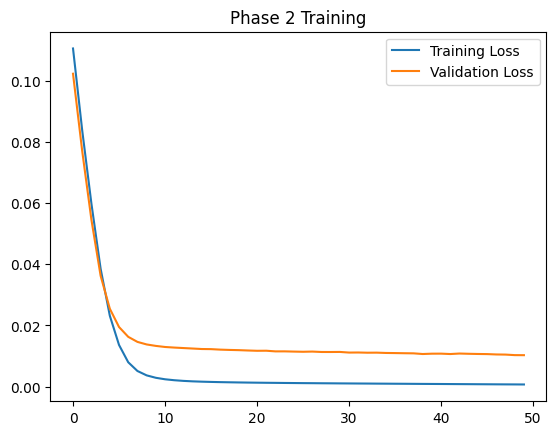

Training for Phase 3
Epoch 1/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1302 - val_loss: 0.0876
Epoch 2/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0789 - val_loss: 0.0537
Epoch 3/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0402 - val_loss: 0.0342
Epoch 4/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0200 - val_loss: 0.0247
Epoch 5/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0103 - val_loss: 0.0204
Epoch 6/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0064 - val_loss: 0.0185
Epoch 7/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0045 - val_loss: 0.0176
Epoch 8/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0035 - val_loss: 0.0172
Epoch 9/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0031 - val_loss: 0.0170
Epoch 10/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0028 - val_loss: 0.0168
Epoch 11/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0026 - val_loss: 0.0167
Epoch 12/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - 

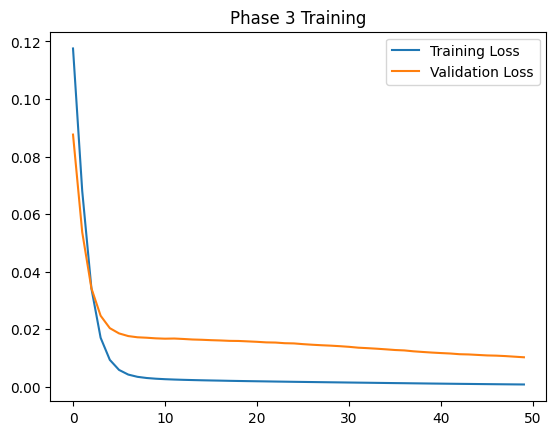

In [20]:
# Function to build and train an autoencoder model for a given phase
def train_autoencoder(phase_data, phase_number):
    input_dim = phase_data.shape[1]
    encoding_dim = int(input_dim / 2)
    
    # Define the autoencoder model
    input_layer = Input(shape=(input_dim,))
    encoder = Dense(encoding_dim, activation="relu")(input_layer)
    decoder = Dense(input_dim, activation="sigmoid")(encoder)
    autoencoder = Model(inputs=input_layer, outputs=decoder)

    # Compile the model
    autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss="mse")

    # Train the model
    history = autoencoder.fit(
        phase_data, phase_data,
        epochs=50,
        batch_size=32,
        shuffle=True,
        validation_split=0.2
    )

    # Plot training and validation loss
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Phase {phase_number} Training')
    plt.legend()
    plt.show()

    return autoencoder

# Prepare data and train the autoencoder for each phase
print("Training for Phase 1")
phase_1_data = data[data['PHASE'] == 1][columns_with_on_off].values
autoencoder_phase_1 = train_autoencoder(phase_1_data, 1)

print("Training for Phase 2")
phase_2_data = data[data['PHASE'] == 2][columns_with_on_off].values
autoencoder_phase_2 = train_autoencoder(phase_2_data, 2)

print("Training for Phase 3")
phase_3_data = data[data['PHASE'] == 3][columns_with_on_off].values
autoencoder_phase_3 = train_autoencoder(phase_3_data, 3)

In [21]:
# Function to evaluate anomalies
def detect_anomalies(autoencoder, phase_data):
    # Get reconstruction error
    reconstructions = autoencoder.predict(phase_data)
    reconstruction_errors = np.mean(np.square(phase_data - reconstructions), axis=1)
    
    # Set the threshold for anomalies (mean + 3 * std as an example)
    threshold = np.mean(reconstruction_errors) + 3 * np.std(reconstruction_errors)
    anomalies = reconstruction_errors > threshold
    
    return reconstruction_errors, threshold, anomalies

# Detect anomalies for each phase
print("Detecting anomalies for Phase 1")
reconstruction_errors_1, threshold_1, anomalies_1 = detect_anomalies(autoencoder_phase_1, phase_1_data)
print(f"Threshold for Phase 1: {threshold_1}")
print(f"Number of anomalies in Phase 1: {np.sum(anomalies_1)}")

print("Detecting anomalies for Phase 2")
reconstruction_errors_2, threshold_2, anomalies_2 = detect_anomalies(autoencoder_phase_2, phase_2_data)
print(f"Threshold for Phase 2: {threshold_2}")
print(f"Number of anomalies in Phase 2: {np.sum(anomalies_2)}")

print("Detecting anomalies for Phase 3")
reconstruction_errors_3, threshold_3, anomalies_3 = detect_anomalies(autoencoder_phase_3, phase_3_data)
print(f"Threshold for Phase 3: {threshold_3}")
print(f"Number of anomalies in Phase 3: {np.sum(anomalies_3)}")

Detecting anomalies for Phase 1
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Threshold for Phase 1: 0.02158919439445217
Number of anomalies in Phase 1: 32
Detecting anomalies for Phase 2
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Threshold for Phase 2: 0.02444681282775101
Number of anomalies in Phase 2: 122
Detecting anomalies for Phase 3
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Threshold for Phase 3: 0.02327182690690623
Number of anomalies in Phase 3: 75


Phase 1 Reconstruction Errors


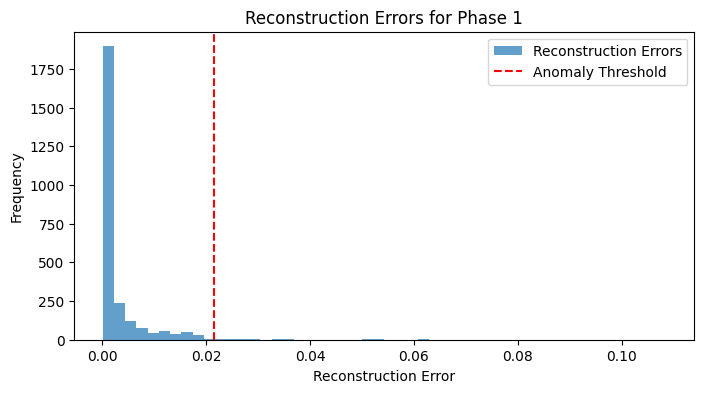

Phase 2 Reconstruction Errors


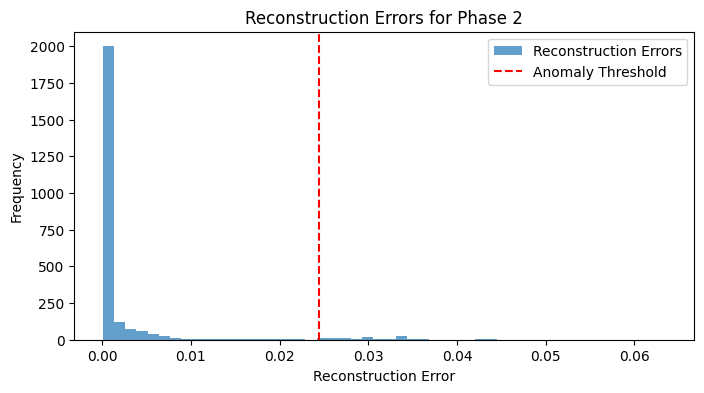

Phase 3 Reconstruction Errors


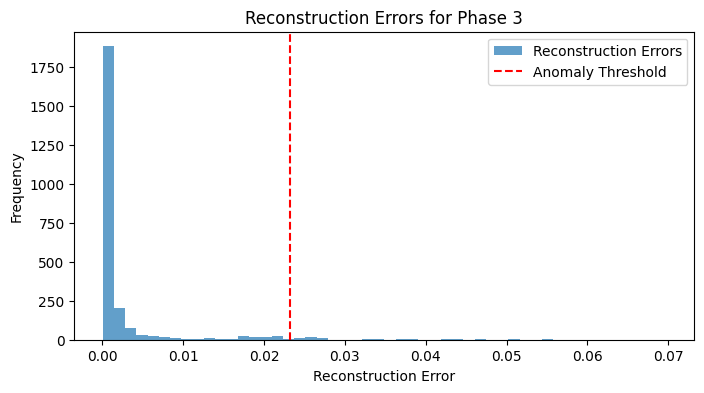

In [22]:
# Function to plot reconstruction errors and threshold
def plot_reconstruction_errors(errors, threshold, phase_num):
    plt.figure(figsize=(8, 4))
    plt.hist(errors, bins=50, alpha=0.7, label='Reconstruction Errors')
    plt.axvline(threshold, color='r', linestyle='--', label='Anomaly Threshold')
    plt.title(f'Reconstruction Errors for Phase {phase_num}')
    plt.xlabel('Reconstruction Error')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

# Plot reconstruction errors for each phase
print("Phase 1 Reconstruction Errors")
plot_reconstruction_errors(reconstruction_errors_1, threshold_1, 1)

print("Phase 2 Reconstruction Errors")
plot_reconstruction_errors(reconstruction_errors_2, threshold_2, 2)

print("Phase 3 Reconstruction Errors")
plot_reconstruction_errors(reconstruction_errors_3, threshold_3, 3)
